In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import load_model
import numpy as np

In [4]:
mnist.load_data??

In [5]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [6]:
len(X_train),len(y_train),len(X_test),len(y_test)

(60000, 60000, 10000, 10000)

## convert the data from 3d to 2d

In [7]:
X_train.ndim

3

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_2d=X_train.reshape(60000,784)

In [10]:
X_train_2d.shape

(60000, 784)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_test_2d=X_test.reshape(10000,784)

In [13]:
X_test_2d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
X_test_2d.shape

(10000, 784)

## normalize the data

In [15]:
X_train_2d_nor=X_train_2d/255

In [16]:
X_train_2d_nor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X_test_2d_nor=X_test_2d/255

In [24]:
X_test_2d_nor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## convert output into categorical

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
print(np.unique(y_train,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [27]:
y_train_cat=np_utils.to_categorical(y_train)

In [28]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
y_train_cat.shape

(60000, 10)

In [30]:
y_test_cat=np_utils.to_categorical(y_test)

In [31]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## architect

In [33]:
model=Sequential()

In [34]:
n_cols=X_train_2d.shape[1]

In [35]:
n_cols

784

In [36]:
model.add(Dense(512,activation="relu",input_shape=(n_cols,)))
model.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))

In [38]:
model.add(Dense(10,activation="softmax"))

In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

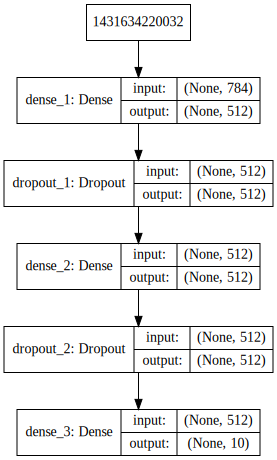

In [40]:
SVG(model_to_dot(model,show_layer_names=True,show_shapes=True).create(prog="dot",format="svg"))

## compile the model

In [41]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [35]:
model.fit??

In [42]:
model_his=model.fit(X_train_2d_nor,
    y_train_cat,
    batch_size=128,
    epochs=10,
    verbose=2,
    validation_data=(X_test_2d_nor,y_test_cat))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 0.2476 - acc: 0.9252 - val_loss: 0.1114 - val_acc: 0.9645
Epoch 2/10
 - 14s - loss: 0.1009 - acc: 0.9693 - val_loss: 0.0765 - val_acc: 0.9748
Epoch 3/10
 - 14s - loss: 0.0723 - acc: 0.9773 - val_loss: 0.0777 - val_acc: 0.9763
Epoch 4/10
 - 15s - loss: 0.0544 - acc: 0.9826 - val_loss: 0.0676 - val_acc: 0.9791
Epoch 5/10
 - 15s - loss: 0.0465 - acc: 0.9852 - val_loss: 0.0678 - val_acc: 0.9802
Epoch 6/10
 - 15s - loss: 0.0374 - acc: 0.9877 - val_loss: 0.0931 - val_acc: 0.9717
Epoch 7/10
 - 16s - loss: 0.0359 - acc: 0.9879 - val_loss: 0.0679 - val_acc: 0.9818
Epoch 8/10
 - 15s - loss: 0.0299 - acc: 0.9899 - val_loss: 0.0671 - val_acc: 0.9806
Epoch 9/10
 - 14s - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0717 - val_acc: 0.9818
Epoch 10/10
 - 15s - loss: 0.0264 - acc: 0.9916 - val_loss: 0.0649 - val_acc: 0.9830


In [47]:
import os

In [48]:
save_dir="F:\\Bala Data Science\\DL Project"
model_name="keras_mnist_digits.h5"
model_path=os.path.join(save_dir,model_name)

In [49]:
model_path

'F:\\Bala Data Science\\DL Project\\keras_mnist_digits.h5'

In [50]:
model.save(model_path)

In [51]:
model_mnist=load_model(model_path)

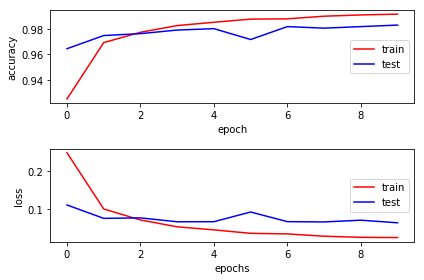

In [43]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(model_his.history["acc"],"r",)
plt.plot(model_his.history["val_acc"],"b")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="center right")
plt.subplot(2,1,2)
plt.plot(model_his.history["loss"],"r",
        model_his.history["val_loss"],"b")
plt.legend(["train","test"],loc="center right")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

In [52]:
loss_and_metrics=model_mnist.evaluate(X_test_2d_nor,y_test_cat)

10000/10000 [==============================] - 1s 145us/step


In [53]:
loss_and_metrics

[0.06490167112227864, 0.983]

In [54]:
loss_and_metrics[0]

0.06490167112227864

In [55]:
loss_and_metrics[1]

0.983

In [58]:
pred_classes=model_mnist.predict_classes(X_test_2d)

In [65]:
correct_indices=np.nonzero(pred_classes==y_test)[0]

In [66]:
incorrect_indices=np.nonzero(pred_classes!=y_test)[0]

In [67]:
print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")

9823 classified correctly
177 classified incorrectly
